In [45]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data_multi.csv')
df

,x_1,x_2,y
0,1.054452,-1.070753,-81.464433
1,-0.362741,-0.634322,-78.752795
2,-0.854096,0.313068,2.218414
3,1.326386,0.298238,52.234160
4,-0.461585,-1.315907,-159.639258
...,...,...,...
95,0.823504,0.771791,86.316340
96,0.976639,0.208275,83.136943
97,-1.347759,1.883151,157.404615
98,0.052165,-1.104383,-136.511136


In [4]:
np.random.seed(0)
X = df[['x_1', 'x_2']].to_numpy()
y = df['y'].to_numpy()
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

In [5]:
train_scores, valid_scores = validation_curve(Ridge(), X, y, "alpha",
                                              np.logspace(-7, 3, 3),
                                              cv=5)
train_scores

/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass param_name=alpha, param_range=[1.e-07 1.e-02 1.e+03] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


array([[0.92924098, 0.9289334 , 0.93492816, 0.9237022 , 0.94248464],
       [0.92924097, 0.92893339, 0.93492815, 0.92370218, 0.94248463],
       [0.14225323, 0.13122965, 0.14837704, 0.11964926, 0.14268903]])

In [6]:
valid_scores

array([[ 0.93665308,  0.93747486,  0.89909186,  0.94330455,  0.87060857],
       [ 0.93665362,  0.93745479,  0.89911908,  0.94331256,  0.87060808],
       [-0.00787713,  0.11368082,  0.08481195, -0.03048749, -0.01153978]])

In [7]:
reg = LinearRegression()
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [8]:
reg = SGDRegressor(learning_rate='constant')

In [9]:
reg.get_params()

{'alpha': 0.0001,
 'average': False,
 'early_stopping': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'constant',
 'loss': 'squared_loss',
 'max_iter': 1000,
 'n_iter_no_change': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'tol': 0.001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [35]:
np.random.seed(0)
train_scores, valid_scores = validation_curve(SGDRegressor(learning_rate='adaptive'), X, y, param_name="eta0",
                                              param_range=np.linspace(0.005, 0.015, 10),
                                              cv=5)

In [36]:
train_scores

array([[0.92924067, 0.92893184, 0.93492793, 0.92370061, 0.94248451],
       [0.92924093, 0.9289326 , 0.93492721, 0.92370108, 0.94248369],
       [0.92923981, 0.92893292, 0.93492705, 0.92370212, 0.94248438],
       [0.92924059, 0.92893311, 0.93492757, 0.92370214, 0.94248409],
       [0.92924037, 0.92893291, 0.93492814, 0.92370117, 0.94248373],
       [0.92924072, 0.9289329 , 0.93492815, 0.92370187, 0.94248364],
       [0.92924035, 0.92893326, 0.93492629, 0.92370188, 0.94248432],
       [0.92924093, 0.92893263, 0.93492804, 0.92370117, 0.94248426],
       [0.92924093, 0.92893323, 0.9349277 , 0.92370169, 0.94248424],
       [0.92924081, 0.92893308, 0.93492744, 0.9237013 , 0.94248399]])

In [78]:
np.random.seed(0)
train_scores, valid_scores = validation_curve(SGDRegressor(learning_rate='constant'), X, y, param_name="eta0",
                                              param_range=np.linspace(0.005, 0.015, 10),
                                              cv=3)

In [79]:
train_scores

array([[0.92202296, 0.93957653, 0.9348781 ],
       [0.92202352, 0.93958492, 0.93488145],
       [0.92202605, 0.93957736, 0.93487621],
       [0.92201685, 0.93954985, 0.93487378],
       [0.92200704, 0.93953361, 0.93488085],
       [0.92198258, 0.9395171 , 0.93483352],
       [0.92196871, 0.93950676, 0.93482514],
       [0.92190495, 0.93954596, 0.93484723],
       [0.92195857, 0.93957987, 0.93483385],
       [0.92184682, 0.93952792, 0.93475774]])

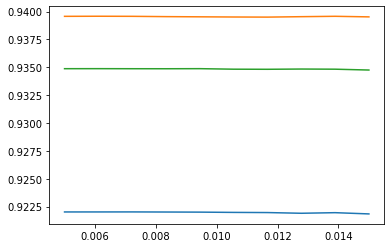

In [81]:
plt.plot(np.linspace(0.005, 0.015, 10), train_scores)

In [82]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

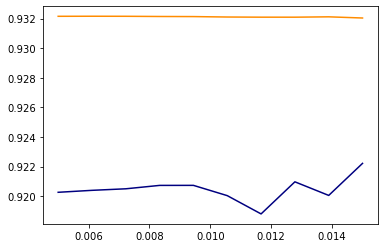

In [90]:
plt.plot(np.linspace(0.005, 0.015, 10), train_scores_mean, color="darkorange")
plt.plot(np.linspace(0.005, 0.015, 10), valid_scores_mean, color="navy")

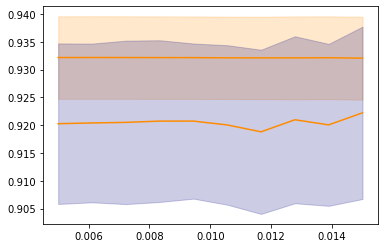

In [91]:
plt.plot(np.linspace(0.005, 0.015, 10), train_scores_mean, color="darkorange")
plt.fill_between(np.linspace(0.005, 0.015, 10), train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(np.linspace(0.005, 0.015, 10), valid_scores_mean, color="darkorange")
plt.fill_between(np.linspace(0.005, 0.015, 10), valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy")

In [94]:
np.random.seed(0)
param_range = np.arange(1,1001)
train_scores, valid_scores = validation_curve(SGDRegressor(learning_rate='constant', eta0=0.01, ), X, y, 
                                              param_name="max_iter",
                                              param_range=param_range,
                                              cv=3)

/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration

/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/home/jo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration

In [95]:
train_scores

array([[0.66313521, 0.74661193, 0.68555006],
       [0.84848784, 0.90534742, 0.86960235],
       [0.90012282, 0.93177916, 0.91607017],
       ...,
       [0.92199104, 0.93956496, 0.93486613],
       [0.92202105, 0.93949565, 0.93483371],
       [0.92202184, 0.93954115, 0.93484445]])

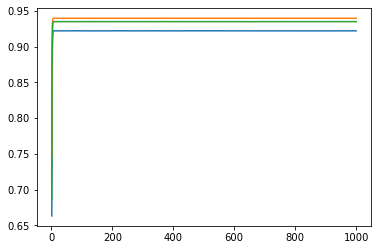

In [96]:
plt.plot(param_range, train_scores)

In [97]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

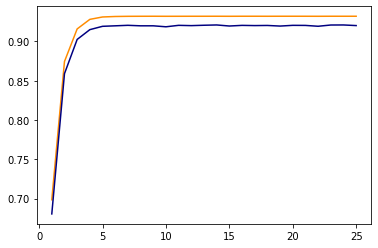

In [101]:
plt.plot(param_range[0:25], train_scores_mean[0:25], color="darkorange")
plt.plot(param_range[0:25], valid_scores_mean[0:25], color="navy")

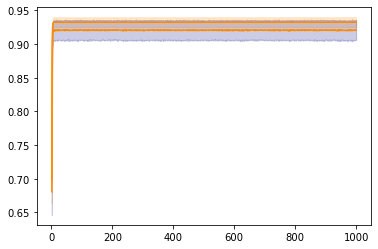

In [102]:
plt.plot(param_range, train_scores_mean, color="darkorange")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(param_range, valid_scores_mean, color="darkorange")
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy")